**Секція 1. Логістична регресія з нуля.**

Будемо крок за кроком будувати модель лог регресії з нуля для передбачення, чи буде врожай більше за 80 яблук (задача подібна до лекційної, але на класифікацію).

Давайте нагадаємо основні формули для логістичної регресії.

### Функція гіпотези - обчислення передбачення у логістичній регресії:

$$
\hat{y} = \sigma(x W^T + b) = \frac{1}{1 + e^{-(x W^T + b)}}
$$

Де:
- $ \hat{y} $ — це ймовірність "позитивного" класу.
- $ x $ — це вектор (або матриця для набору прикладів) вхідних даних.
- $ W $ — це вектор (або матриця) вагових коефіцієнтів моделі.
- $ b $ — це зміщення (bias).
- $ \sigma(z) $ — це сигмоїдна функція активації.

### Як обчислюється сигмоїдна функція:

Сигмоїдна функція $ \sigma(z) $ має вигляд:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Ця функція перетворює будь-яке дійсне значення $ z $ в інтервал від 0 до 1, що дозволяє інтерпретувати вихід як ймовірність для логістичної регресії.

### Формула функції втрат для логістичної регресії (бінарна крос-ентропія):

Функція втрат крос-ентропії оцінює, наскільки добре модель передбачає класи, порівнюючи передбачені ймовірності $ \hat{y} $ із справжніми мітками $ y $. Формула наступна:

$$
L(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Де:
- $ y $ — це справжнє значення (мітка класу, 0 або 1).
- $ \hat{y} $ — це передбачене значення (ймовірність).



1.
Тут вже наведений код для ініціювання набору даних в форматі numpy. Перетворіть `inputs`, `targets` на `torch` тензори. Виведіть результат на екран.

In [1]:
import torch
import numpy as np

In [2]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

In [3]:
# Перетворення на torch тензори
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

# Виведення
print("Inputs tensor:\n", inputs_tensor)
print("\nTargets tensor:\n", targets_tensor)

Inputs tensor:
 tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

Targets tensor:
 tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])


2. Ініціюйте ваги `w`, `b` для моделі логістичної регресії потрібної форми зважаючи на розмірності даних випадковими значеннями з нормального розподілу. Лишаю тут код для фіксації `random_seed`.

In [4]:
torch.random.manual_seed(1)

In [5]:
# Розмірність входу: 3 фічі -> відповідно вага має бути (3, 1)
w = torch.randn(3, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Виведення
print("Weights (w):\n", w)
print("\nBias (b):\n", b)

Weights (w):
 tensor([[0.6614],
        [0.2669],
        [0.0617]], requires_grad=True)

Bias (b):
 tensor([0.6213], requires_grad=True)


3. Напишіть функцію `model`, яка буде обчислювати функцію гіпотези в логістичній регресії і дозволяти робити передбачення на основі введеного рядка даних і коефіцієнтів в змінних `w`, `b`.

  **Важливий момент**, що функція `model` робить обчислення на `torch.tensors`, тож для математичних обчислень використовуємо фукнціонал `torch`, наприклад:
  - обчсилення $e^x$: `torch.exp(x)`
  - обчсилення $log(x)$: `torch.log(x)`
  - обчислення середнього значення вектору `x`: `torch.mean(x)`

  Використайте функцію `model` для обчислення передбачень з поточними значеннями `w`, `b`.Виведіть результат обчислень на екран.

  Проаналізуйте передбачення. Чи не викликають вони у вас підозр? І якщо викликають, то чим це може бути зумовлено?

In [6]:
# Сигмоїдна функція
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# Функція моделі
def model(x):
    return sigmoid(x @ w + b)

# Передбачення
preds = model(inputs_tensor)

# Вивід результатів
print("Model predictions:\n", preds)

Model predictions:
 tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<MulBackward0>)


Ці передбачення викликають підозру. Модель видає ймовірність класу 1 = 1.0 для всіх прикладів - тобто впевнена. Але ми знаємо, що в таргетах є як 0, так і 1. Значить:

Модель не диференціює приклади взагалі.

Значення активації настільки великі, що сигмоїда насичується → дає результат ≈ 1.

4. Напишіть функцію `binary_cross_entropy`, яка приймає на вхід передбачення моделі `predicted_probs` та справжні мітки в даних `true_labels` і обчислює значення втрат (loss)  за формулою бінарної крос-ентропії для кожного екземпляра та вертає середні втрати по всьому набору даних.
  Використайте функцію `binary_cross_entropy` для обчислення втрат для поточних передбачень моделі.

In [7]:
def binary_cross_entropy(predicted_probs, true_labels):
    # Додаємо епсілон, щоб уникнути log(0)
    epsilon = 1e-7
    predicted_probs = torch.clamp(predicted_probs, epsilon, 1 - epsilon)

    loss = - (true_labels * torch.log(predicted_probs) +
              (1 - true_labels) * torch.log(1 - predicted_probs))
    return torch.mean(loss)

# Обчислення втрат для поточних передбачень
loss_value = binary_cross_entropy(preds, targets_tensor)

# Виведення
print("Binary cross-entropy loss:\n", loss_value.item())

Binary cross-entropy loss:
 6.376954078674316


Таке велике значення втрат (6.38) — це ще один індикатор, що модель повністю неадекватна на старті, і передбачення не збігаються з реальністю (а у нас всі preds ≈ 1, тоді як targets містять і 0, і 1).

5. Зробіть зворотнє поширення помилки і виведіть градієнти за параметрами `w`, `b`. Проаналізуйте їх значення. Як гадаєте, чому вони саме такі?

In [8]:
# 1. Передбачення (знову, щоб мати актуальні обчислення)
preds = model(inputs_tensor)

# 2. Втрати
loss = binary_cross_entropy(preds, targets_tensor)

# 3. Зворотнє поширення помилки
loss.backward()

# 4. Виведення градієнтів
print("Gradient for w:\n", w.grad)
print("\nGradient for b:\n", b.grad)

Gradient for w:
 tensor([[0.],
        [0.],
        [0.]])

Gradient for b:
 tensor([0.])


Це несподівано: усі градієнти — нулі, а значення втрат при цьому було велике (6.38).



**Що сталось?**

В цій задачі, коли ми ініціювали значення випадковими значеннями з нормального розподілу, насправді ці значення не були дуже гарними стартовими значеннями і привели до того, що градієнти стали дуже малими або навіть рівними нулю (це призводить до того, що градієнти "зникають"), і відповідно при оновленні ваг у нас не буде нічого змінюватись. Це називається `gradient vanishing`. Це відбувається через **насичення сигмоїдної функції активації.**

У нашій задачі ми використовуємо сигмоїдну функцію активації, яка має такий вигляд:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$


Коли значення $z$ дуже велике або дуже мале, сигмоїдна функція починає "насичуватись". Це означає, що для великих позитивних $z$ сигмоїда наближається до 1, а для великих негативних — до 0. В цих діапазонах градієнти починають стрімко зменшуватись і наближаються до нуля (бо градієнт - це похідна, похідна на проміжку функції, де вона паралельна осі ОХ, дорівнює 0), що робить оновлення ваг неможливим.

![](https://editor.analyticsvidhya.com/uploads/27889vaegp.png)

У логістичній регресії $ z = x \cdot w + b $. Якщо ваги $w, b$ - великі, значення $z$ також буде великим, і сигмоїда перейде в насичену область, де градієнти дуже малі.

Саме це сталося в нашій задачі, де великі випадкові значення ваг викликали насичення сигмоїдної функції. Це в свою чергу призводить до того, що під час зворотного поширення помилки (backpropagation) модель оновлює ваги дуже повільно або зовсім не оновлює. Це називається проблемою **зникнення градієнтів** (gradient vanishing problem).

**Що ж робити?**
Ініціювати ваги маленькими значеннями навколо нуля. Наприклад ми можемо просто в існуючій ініціалізації ваги розділити на 1000. Можна також використати інший спосіб ініціалізації вагів - інформація про це [тут](https://www.geeksforgeeks.org/initialize-weights-in-pytorch/).

Як це робити - показую нижче. **Виконайте код та знову обчисліть передбачення, лосс і виведіть градієнти.**

А я пишу пояснення, чому просто не зробити

```
w = torch.randn(1, 3, requires_grad=True)/1000
b = torch.randn(1, requires_grad=True)/1000
```

Нам потрібно, аби тензори вагів були листовими (leaf tensors).

1. **Що таке листовий тензор**
Листовий тензор — це тензор, який був створений користувачем безпосередньо і з якого починається обчислювальний граф. Якщо такий тензор має `requires_grad=True`, PyTorch буде відслідковувати всі операції, виконані над ним, щоб правильно обчислювати градієнти під час навчання.

2. **Чому ми використовуємо `w.data` замість звичайних операцій**
Якщо ми просто виконали б операції, такі як `(w - 0.5) / 100`, ми б отримали **новий тензор**, який вже не був би листовим тензором, оскільки ці операції створюють **новий** тензор, а не модифікують існуючий.

  Проте, щоб залишити наші тензори ваги `w` та зміщення `b` листовими і продовжити можливість відстеження градієнтів під час тренування, ми використовуємо атрибут `.data`. Цей атрибут дозволяє **виконувати операції in-place (прямо на існуючому тензорі)** без зміни самого об'єкта тензора. Отже, тензор залишається листовим, і PyTorch може коректно обчислювати його градієнти.

3. **Чому важливо залишити тензор листовим**
Якщо тензор більше не є листовим (наприклад, через проведення операцій, що створюють нові тензори), ви не зможете отримати градієнти за допомогою `w.grad` чи `b.grad` після виклику `loss.backward()`. Це може призвести до втрати можливості оновлення параметрів під час тренування моделі. В нашому випадку ми хочемо, щоб тензори `w` та `b` накопичували градієнти, тому вони повинні залишатись листовими.

**Висновок:**
Ми використовуємо `.data`, щоб виконати операції зміни значень на ваги і зміщення **in-place**, залишаючи їх листовими тензорами, які можуть накопичувати градієнти під час навчання. Це дозволяє коректно працювати механізму зворотного поширення помилки (backpropagation) і оновлювати ваги моделі.

5. Виконайте код та знову обчисліть передбачення, лосс і знайдіть градієнти та виведіть всі ці тензори на екран.

In [10]:
torch.random.manual_seed(1)
w = torch.randn(1, 3, requires_grad=True)  # Листовий тензор
b = torch.randn(1, requires_grad=True)     # Листовий тензор

# in-place операції
w.data = w.data / 1000
b.data = b.data / 1000

In [13]:
def model(x):
    return sigmoid(x @ w.T + b)

# Передбачення
preds = model(inputs_tensor)

# Функція втрат
loss_fn = torch.nn.BCELoss()
loss = loss_fn(preds, targets_tensor)

# Обнулення градієнтів
w.grad = None
b.grad = None

# Зворотне поширення
loss.backward()

# Виведення результатів
print("Predictions:\n", preds)
print("\nLoss:\n", loss.item())
print("\nGradient w:\n", w.grad)
print("\nGradient b:\n", b.grad)

Predictions:
 tensor([[0.5174],
        [0.5220],
        [0.5244],
        [0.5204],
        [0.5190]], grad_fn=<MulBackward0>)

Loss:
 0.6829456686973572

Gradient w:
 tensor([[ -5.4417, -18.9853, -10.0682]])

Gradient b:
 tensor([-0.0794])


Значення всі ≈ 0.52 — модель ще не навчена, але не перебуває в зоні насичення, тобто градієнти обчислюються коректно.

Модель слабко диференціює приклади — це нормально на старті.


Loss Близько до log(2) ≈ 0.693, що типовий результат для початково випадкової бінарної моделі.

Градієнти: Значення нормальні за масштабом — не 0 і не нескінченність.

Найбільший вплив має друга фіча (rainfall), менший — temp і humidity.

Це означає, що PyTorch тепер може оновлювати ваги, і модель поступово навчатиметься.



6. Напишіть алгоритм градієнтного спуску, який буде навчати модель з використанням написаних раніше функцій і виконуючи оновлення ваг. Алгоритм має включати наступні кроки:

  1. Генерація прогнозів
  2. Обчислення втрат
  3. Обчислення градієнтів (gradients) loss-фукнції відносно ваг і зсувів
  4. Налаштування ваг шляхом віднімання невеликої величини, пропорційної градієнту (`learning_rate` домножений на градієнт)
  5. Скидання градієнтів на нуль

Виконайте градієнтний спуск протягом 1000 епох, обчисліть фінальні передбачення і проаналізуйте, чи вони точні?

In [18]:
print("Min prediction:", preds.min().item())
print("Max prediction:", preds.max().item())

Min prediction: nan
Max prediction: nan


In [19]:
# Навчальні параметри
learning_rate = 0.01
epochs = 1000

# Функція втрат
loss_fn = torch.nn.BCELoss()

for epoch in range(epochs):
    # 1. Передбачення
    preds = model(inputs_tensor)

    # 2. Обчислення втрат
    loss = loss_fn(preds, targets_tensor)

    # 3. Зворотне поширення помилки (обчислення градієнтів)
    loss.backward()

    # 4. Оновлення ваг (вручну)
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # 5. Обнулення градієнтів
    w.grad.zero_()
    b.grad.zero_()

    # (Опційно: виводити втрати кожні 100 епох)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

**Секція 2. Створення лог регресії з використанням функціоналу `torch.nn`.**

Давайте повторно реалізуємо ту ж модель, використовуючи деякі вбудовані функції та класи з PyTorch.

Даних у нас буде побільше - тож, визначаємо нові масиви.

In [21]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

7. Завантажте вхідні дані та мітки в PyTorch тензори та з них створіть датасет, який поєднує вхідні дані з мітками, використовуючи клас `TensorDataset`. Виведіть перші 3 елементи в датасеті.



In [24]:
import torch
from torch.utils.data import TensorDataset
import numpy as np

# Перетворення на тензори
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

# Створення датасету
dataset = TensorDataset(inputs_tensor, targets_tensor)

# Виведення перших 3 елементів
for i in range(3):
    print(f"Element {i}: input = {dataset[i][0]}, target = {dataset[i][1]}")

Element 0: input = tensor([73., 67., 43.]), target = tensor([0.])
Element 1: input = tensor([91., 88., 64.]), target = tensor([1.])
Element 2: input = tensor([ 87., 134.,  58.]), target = tensor([1.])


8. Визначте data loader з класом **DataLoader** для підготовленого датасету `train_ds`, встановіть розмір батчу на 5 та увімкніть перемішування даних для ефективного навчання моделі. Виведіть перший елемент в дата лоадері.

In [25]:
from torch.utils.data import DataLoader

# DataLoader з батчем 5 і shuffle=True
train_dl = DataLoader(dataset, batch_size=5, shuffle=True)

# Отримання першого батчу з DataLoader
for xb, yb in train_dl:
    print("First batch - inputs:\n", xb)
    print("First batch - targets:\n", yb)
    break  # тільки перший батч

First batch - inputs:
 tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [102.,  43.,  37.]])
First batch - targets:
 tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.]])


9. Створіть клас `LogReg` для логістичної регресії, наслідуючи модуль `torch.nn.Module` за прикладом в лекції (в частині про FeedForward мережі).

  У нас модель складається з лінійної комбінації вхідних значень і застосування фукнції сигмоїда. Тож, нейромережа буде складатись з лінійного шару `nn.Linear` і використання активації `nn.Sigmid`. У створеному класі мають бути реалізовані методи `__init__` з ініціалізацією шарів і метод `forward` для виконання прямого проходу моделі через лінійний шар і функцію активації.

  Створіть екземпляр класу `LogReg` в змінній `model`.

In [26]:
import torch.nn as nn

# Визначення класу логістичної регресії
class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)        # 3 вхідні фічі, 1 вихід
        self.activation = nn.Sigmoid()       # сигмоїдна активація

    def forward(self, x):
        return self.activation(self.linear(x))

# Створення моделі
model = LogReg()

10. Задайте оптимізатор `Stockastic Gradient Descent` в змінній `opt` для навчання моделі логістичної регресії. А також визначіть в змінній `loss` функцію втрат `binary_cross_entropy` з модуля `torch.nn.functional` для обчислення втрат моделі. Обчисліть втрати для поточних передбачень і міток, а потім виведіть їх. Зробіть висновок, чи моделі вдалось навчитись?

In [27]:
import torch.nn.functional as F
import torch.optim as optim

# Оптимізатор: стохастичний градієнтний спуск
opt = optim.SGD(model.parameters(), lr=0.01)

# Передбачення для всього датасету
preds = model(inputs_tensor)

# Функція втрат
loss = F.binary_cross_entropy(preds, targets_tensor)

# Виведення втрат
print("Loss:", loss.item())


Loss: 7.631152629852295


Це дуже велике значення для задачі логістичної регресії.

Модель не навчена: її початкові ваги дають дуже погані передбачення.

11. Візьміть з лекції функцію для тренування моделі з відстеженням значень втрат і навчіть щойно визначену модель на 1000 епохах. Виведіть після цього графік зміни loss, фінальні передбачення і значення таргетів.

In [28]:
import matplotlib.pyplot as plt

def train_model(model, train_dl, loss_fn, opt, epochs=1000):
    loss_history = []

    for epoch in range(epochs):
        for xb, yb in train_dl:
            # 1. Передбачення
            preds = model(xb)

            # 2. Обчислення втрат
            loss = loss_fn(preds, yb)

            # 3. Зворотне поширення
            loss.backward()

            # 4. Оновлення параметрів
            opt.step()

            # 5. Обнулення градієнтів
            opt.zero_grad()

        # Запис втрат після кожної епохи
        loss_history.append(loss.item())

        # Вивід кожні 100 епох
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

    return loss_history

In [29]:
# Заново ініціалізуємо оптимізатор, щоб він "забув" старі градієнти
opt = optim.SGD(model.parameters(), lr=0.01)

# Loss функція з torch.nn.functional
loss_fn = F.binary_cross_entropy

# Навчання
losses = train_model(model, train_dl, loss_fn, opt, epochs=1000)

Epoch 0: Loss = 40.0000
Epoch 100: Loss = 80.0000
Epoch 200: Loss = 40.0000
Epoch 300: Loss = 40.0000
Epoch 400: Loss = 20.0000
Epoch 500: Loss = 20.0000
Epoch 600: Loss = 60.0000
Epoch 700: Loss = 0.0000
Epoch 800: Loss = 40.0000
Epoch 900: Loss = 20.0000


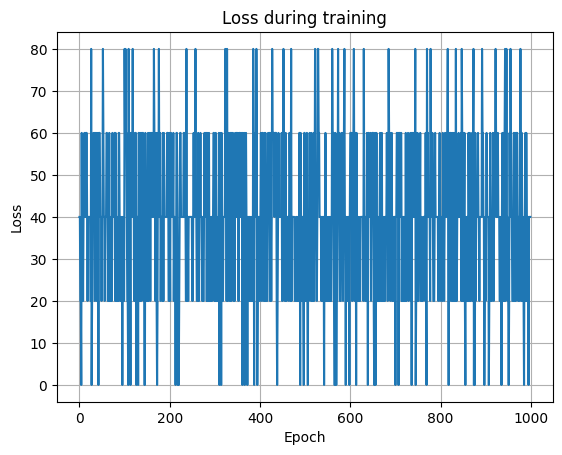

In [30]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss during training")
plt.grid(True)
plt.show()

In [31]:
final_preds = model(inputs_tensor)
predicted_classes = (final_preds >= 0.5).float()

print("Final predictions (probabilities):\n", final_preds)
print("\nPredicted classes:\n", predicted_classes)
print("\nTrue targets:\n", targets_tensor)

Final predictions (probabilities):
 tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SigmoidBackward0>)

Predicted classes:
 tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

True targets:
 tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]])
